In [6]:
from __future__ import print_function, division

In [45]:
import os
from itertools import izip, product
import numpy as np
from scipy import linalg
from astropy.table import Table, join
from mica.archive.aca_dark import dark_cal
import chandra_aca
from kadi import events
from matplotlib import pyplot as plt
%matplotlib inline
import tables
from Chandra.Time import DateTime

In [77]:
guides = Table(np.load('guide_stats.npy'))

In [78]:
guides['mult_frac'] = guides['mult_star_samples'] / guides['n_samples']

In [79]:
guides[:3]

obsid,obi,agasc_id,type,kalman_tstart,yag,zag,mag,n_samples,mult_star_samples,slot,mult_frac
int64,int64,int64,string24,float64,float64,float64,float64,int64,int64,int64,float64
11496,0,49808696,BOT,378717526.326,1270.1,-1430.575,9.25,7591,2,3,0.000263469898564
11496,0,49809784,BOT,378717526.326,877.975,96.925,7.125,7591,0,4,0.0
11496,0,49810096,BOT,378717526.326,696.725,-1881.25,9.25,7591,6,5,0.000790409695692


In [80]:
ok = guides['kalman_tstart'] > DateTime('2014:001').secs

(8, 11.2)

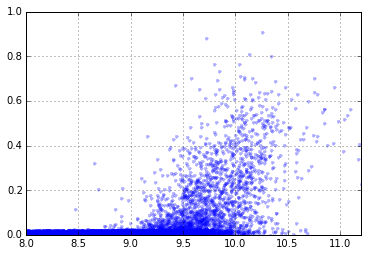

In [81]:
size = np.count_nonzero(ok)
dx = np.random.uniform(-0.1, 0.1, size=size)
dy = np.random.uniform(0.0, 0.02, size=size)
plt.plot(guides['mag'][ok] + dx, guides['mult_frac'][ok] + dy, '.', alpha=0.3)
plt.grid()
plt.xlim(8, 11.2)

In [82]:
h5 = tables.openFile('/proj/sot/ska/data/acq_stats/acq_stats.h5')
tstart = DateTime('2009:360:00:00:00').secs
acqs = h5.root.data.readWhere('guide_tstart > {}'.format(tstart))
h5.close()

In [83]:
len(acqs)

62240

In [84]:
acqs = Table(acqs).group_by('obsid')

In [85]:
acqs_obsid = acqs[acqs.groups.indices[:-1]]
acq_index = {obsid: index for index, obsid in enumerate(acqs_obsid['obsid'])}

In [86]:
guides = join(guides, acqs_obsid['obsid', 'n100_warm_frac'])


In [87]:
ok = np.abs(guides['mag'] - 10.0) < 0.2
gok = guides[ok]

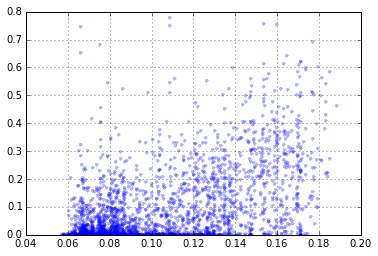

In [88]:
plt.plot(gok['n100_warm_frac'], gok['mult_frac'], '.', alpha=0.3)
plt.grid()

In [89]:
ok2 = (gok['mult_frac'] > 0.5) & (gok['n100_warm_frac'] > 0.16)
gok[ok2]

obsid,obi,agasc_id,type,kalman_tstart,yag,zag,mag,n_samples,mult_star_samples,slot,mult_frac,n100_warm_frac
int64,int64,int64,string24,float64,float64,float64,float64,int64,int64,int64,float64,float64
16076,0,188353456,BOT,539394770.278,-1682.05,1390.075,10.0,14783,7587,3,0.513224649936,0.171090080762
16117,0,187305256,GUI,539410665.979,-1138.075,2160.2,9.8125,15507,8801,7,0.567550138647,0.170629902582
17556,1,845808496,BOT,534557036.509,1767.6,1298.225,10.0625,46535,23327,6,0.5012786075,0.180763324627
52038,1,257306792,BOT,541718178.908,-1875.375,1980.825,10.125,11935,8287,7,0.694344365312,0.176939236897
52039,1,257306792,BOT,541709909.208,-1881.675,1974.975,10.1875,7761,4209,7,0.542327019714,0.183115405362
52056,2,189663632,BOT,541025282.97,1575.3125,-1916.4,9.9375,816,418,4,0.512254901961,0.17660246355
52074,1,189139752,BOT,540378958.933,1241.65,-2160.625,10.0,9489,4888,3,0.515122773738,0.176278683728
52088,1,330039448,GUI,540111278.118,-557.975,-1600.3,9.875,2777,1460,7,0.525747209219,0.161572878679
52263,1,86116848,BOT,534626166.612,1391.6,781.075,10.0625,5267,2970,5,0.563888361496,0.180798563211
